Autors del Notebook: Miguel López Manzanares         NIU: 1673970
                     Yassin Nakmouche Sahli M'Ghaiti NIU: 1674585
                     
El nostre objectiu es poder predir el cost mèdic de cada persona tenin en compte features com l'edat, sexe, si són fumadors o no entre altres.

Per començar hem d'importar regressió lineal de sklearn, numpy i pandas.

També importare el seaborn per poder visualitzar gràficament les dades per poder tenir més informació visual.

In [2]:
#Importem la regressio lineal aixi com pandas i numpy
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge

Carreguem el dataset de medical insurance

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
#Mirem rapid el dataset
print (df.keys())

#Mirem les columnes amb nans
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)
not_nan_columns = df.columns[~(df.isna().sum()>0)].tolist()

#Eliminem les columnes amb nans
df = df.loc[:,not_nan_columns]

#Mirem els tipus de les columnes
print (df.dtypes)

#Mirem el tamany
print (df.size)

#Mirem descripcio general
print (df.describe())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Series([], dtype: float64)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
9366
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Aqui convertim la columna sex, children i region en numeriques perque el model les pugui processar. Importem label encoder per poder convertir les dades com male female en binaries.

In [5]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])

label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])

print(df.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


Aqui mostrem amb la llibreria seaborn les relacions d'un features amb altres features per poder veure que tan balancejades estan les dades i tenim més informació visual sobre com estan de distribuides les dades.

C:\Users\yassi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


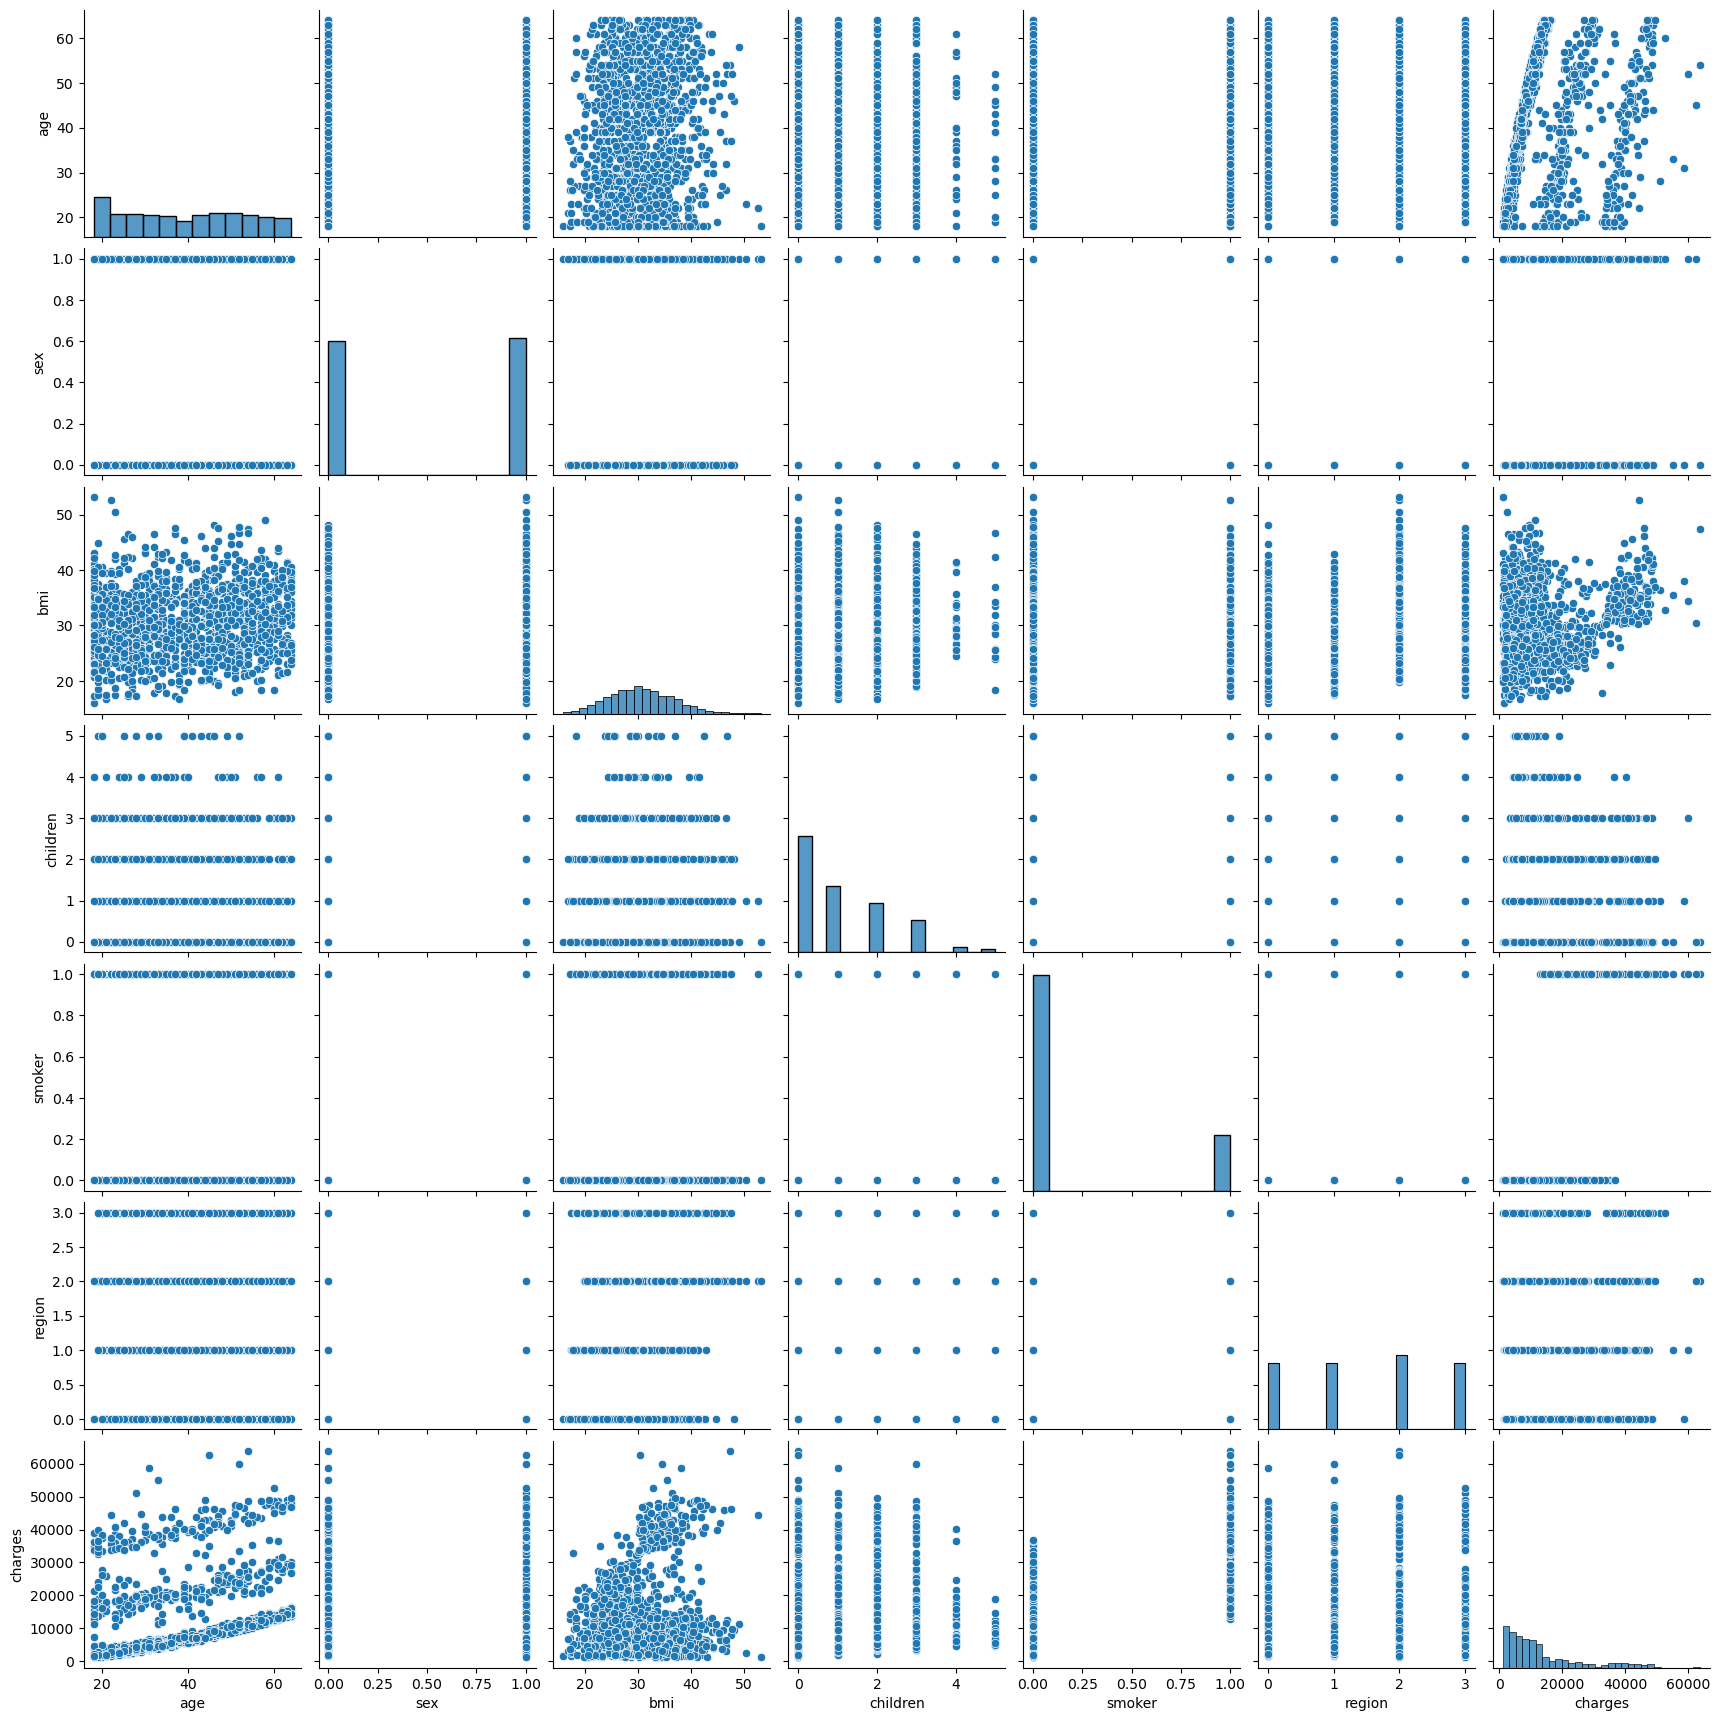

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Explicar les correlacions amb cada feature.

<Axes: >

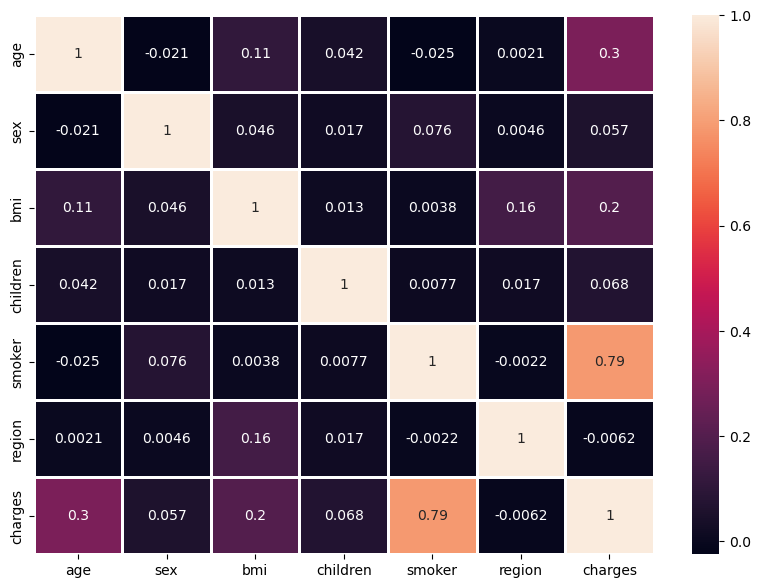

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, linewidths = 2)

Explicar que la correlacion mas alta es smokers

In [9]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [10]:
X = df[l_column[0:len_feature-1]]
y = df[l_column[len_feature-1]]

In [11]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (1338, 6)
Variable set size: (1338,)


In [12]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Test-train split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [75]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (1070, 6)
Test feature set size: (268, 6)
Training variable set size: (1070,)
Test variable set size: (268,)


### Model fit and training

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [77]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [78]:
lm.fit(X_train,y_train)

LinearRegression()

In [79]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -12059.705725997803


In [80]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [  246.37828441  -114.83256717   348.9111923    426.82952742
 23359.41208054  -258.01868867]


In [81]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
age,246.378284
sex,-114.832567
bmi,348.911192
children,426.829527
smoker,23359.412081
region,-258.018689


Text(0.5, 1.0, 'smoker vs. charges')

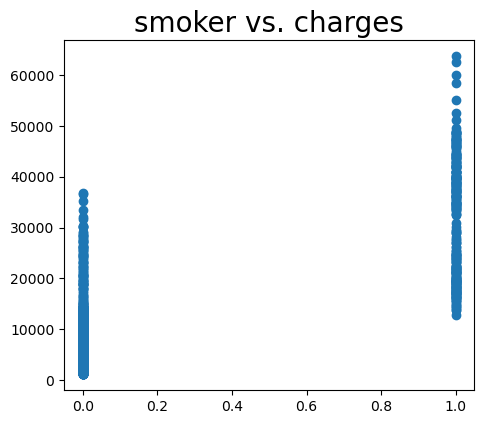

In [82]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[4]],df['charges'])
ax0.set_title(l[4]+" vs. charges", fontdict={'fontsize':20})

### Prediction, error estimate, and regression evaluation matrices

In [83]:
y_pred = lm.predict(X_test)


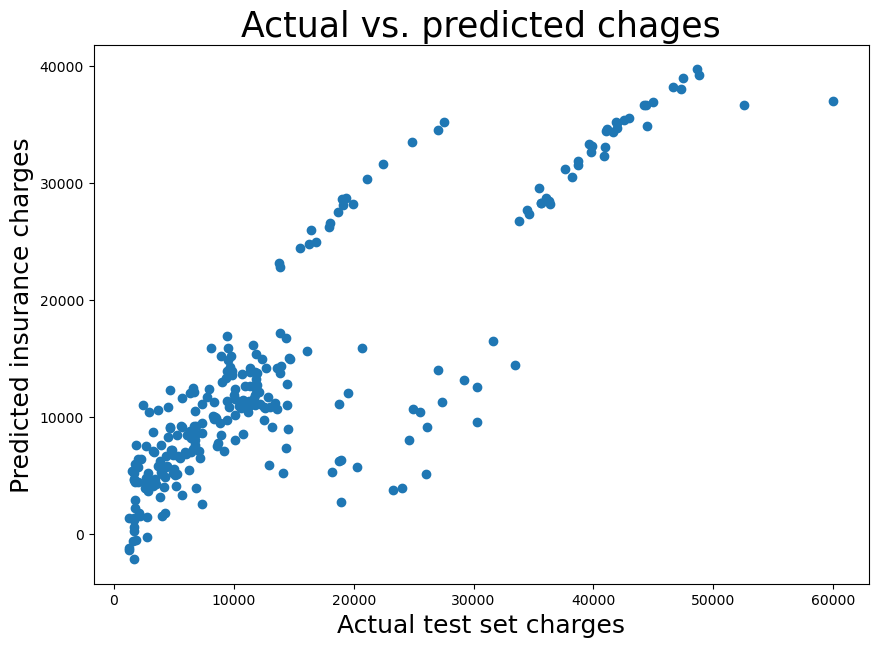

In [84]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted chages",fontsize=25)
plt.xlabel("Actual test set charges",fontsize=18)
plt.ylabel("Predicted insurance charges", fontsize=18)
plt.scatter(x=y_test,y=y_pred)

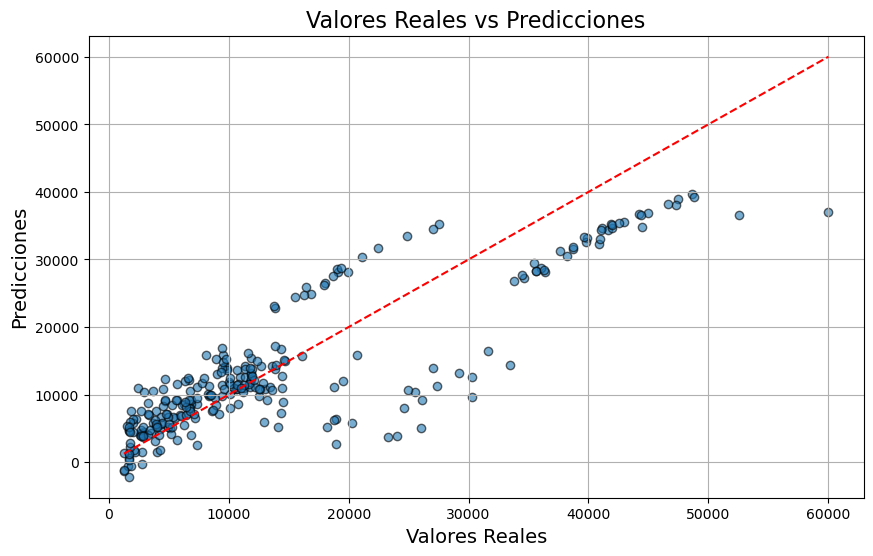

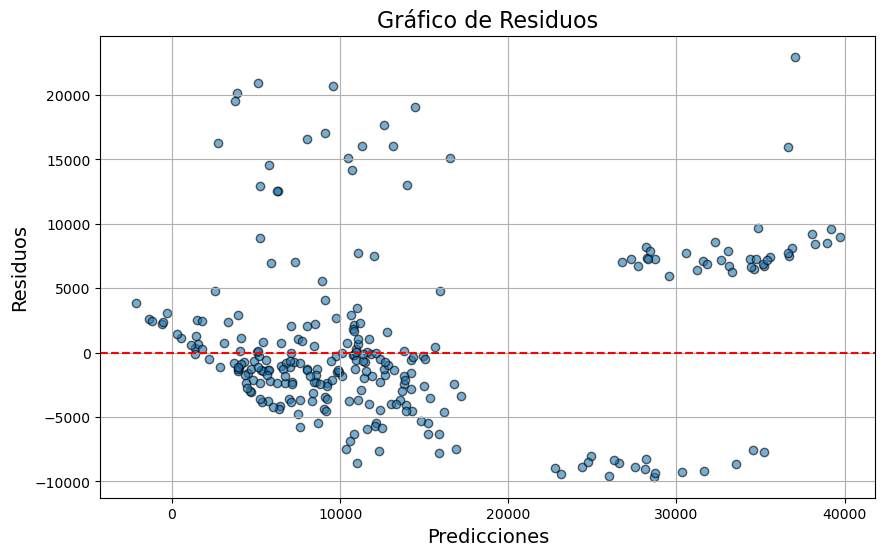

In [85]:
# Suponiendo que tienes:
# y_test: valores reales
# y_pred: predicciones

# 1. Gráfico de dispersión (Reales vs Predicciones)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.title("Valores Reales vs Predicciones", fontsize=16)
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Predicciones", fontsize=14)
plt.grid(True)
plt.show()

# 2. Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r', linestyle='--')  # Línea en 0
plt.title("Gráfico de Residuos", fontsize=16)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Residuos", fontsize=14)
plt.grid(True)
plt.show()

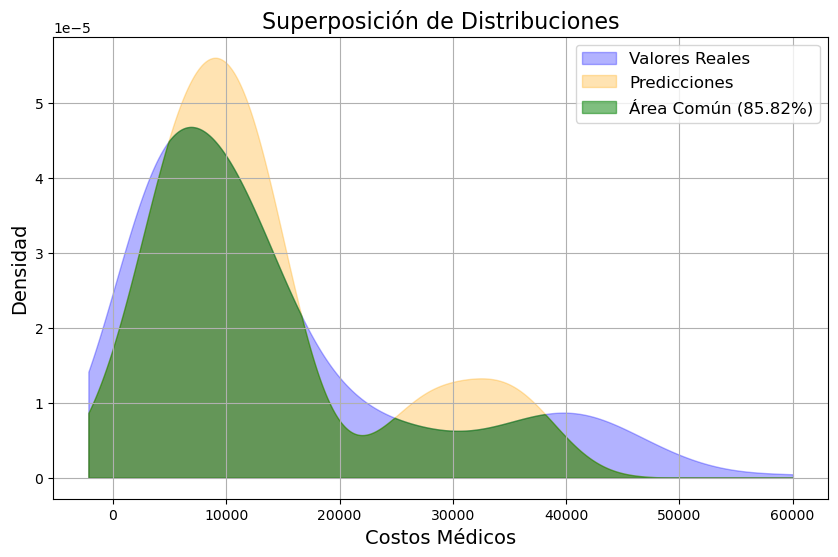

Porcentaje de área común: 85.82%


In [86]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Crear un rango común de valores para comparar densidades
common_x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 500)

# Estimar densidades usando gaussian_kde
kde_real = gaussian_kde(y_test)
kde_pred = gaussian_kde(y_pred)

y_real_density = kde_real(common_x)
y_pred_density = kde_pred(common_x)

# Calcular la intersección de áreas (mínimo entre ambas curvas)
intersection = np.minimum(y_real_density, y_pred_density)

# Calcular el área común bajo la curva
common_area = simps(intersection, common_x)

# Calcular el área total bajo la curva de los valores reales
total_area_real = simps(y_real_density, common_x)

# Porcentaje de área común
overlap_percentage = (common_area / total_area_real) * 100

# Graficar las distribuciones y la superposición
plt.figure(figsize=(10, 6))
plt.fill_between(common_x, y_real_density, color='blue', alpha=0.3, label="Valores Reales")
plt.fill_between(common_x, y_pred_density, color='orange', alpha=0.3, label="Predicciones")
plt.fill_between(common_x, intersection, color='green', alpha=0.5, label=f"Área Común ({overlap_percentage:.2f}%)")
plt.title("Superposición de Distribuciones", fontsize=16)
plt.xlabel("Costos Médicos", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Mostrar el porcentaje de área común
print(f"Porcentaje de área común: {overlap_percentage:.2f}%")
